<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/pruning_quick_start_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# **剪定クイックスタート**
**モデル（計算式／計算方法）剪定**を始めるための3分間のビデオをご紹介します。



モデル（計算式／計算方法）の枝刈りとは、モデル（計算式／計算方法）の**重みサイズ**や**中間状態サイズ**を**小さくする**ことで、**モデル（計算式／計算方法）サイズ**や**計算量を減らす手法**です。 DNNのモデル（計算式／計算方法）の枝刈りには、3つの一般的な方法があります。


###.**モデル（計算式／計算方法）の事前学習** → **モデル（計算式／計算方法）の刈り込み** → **刈り込んだモデル（計算式／計算方法）の微調整**

###.**学習中にモデル（計算式／計算方法）を刈り取る（＝刈り取り認識学習）**→**刈り取られたモデル（計算式／計算方法）を微調整**する

###.**モデル（計算式／計算方法）の刈り込み** → **刈り込んだモデル（計算式／計算方法）を一から学習**させる


NNI(ニューラルネット・インテリジェンス)は、**キー・L1ノルム（マンハッタン距離、「大きさ」、各成分の絶対値の和）の段階**で作業することにより、上記のすべての**プルーニング(剪定)**をサポートします。 この**教材**に沿って、**NNI(ニューラルネット・インテリジェンス)**を使ってモデル（計算式／計算方法）を**プルーニング(剪定)**する一般的な方法を簡単に見てみましょう。

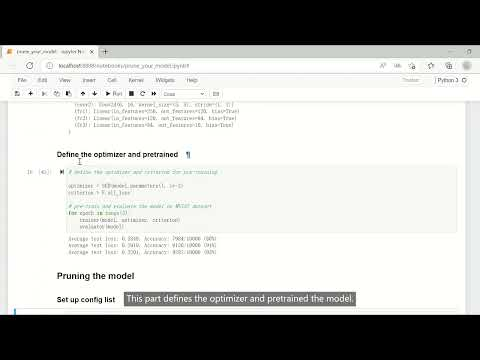

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('wKh51Jnr0a8', width=400, height=300)

## **準備**
この教材では、MNIST(手書き数字の画像)データセットで**事前に学習した簡単なモデル（計算式／計算方法）**を使用します。 **pytorch**での**モデル（計算式／計算方法）の定義**と**学習**に慣れている方は、モデル（計算式／計算方法）の刈り込みまで直接読み飛ばしてください。



In [4]:
!pip install nni

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.0 MB 1.1 MB/s 
     |████████████████████████████████| 51 kB 11.3 MB/s 
     |████████████████████████████████| 106 kB 84.3 MB/s 
     |████████████████████████████████| 139 kB 85.6 MB/s 
     |████████████████████████████████| 127 kB 105.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [6]:
import torch
import torch.nn.functional as F
from torch.optim import SGD#確率的勾配降下法(stochastic gradient descent, SGD)（オプションで運動量付き）を実装する。

from nni_assets.compression.mnist_model import TorchModel, trainer, evaluator, device
# モデル（計算式／計算方法）を定義する
model = TorchModel().to(device)

# prunerはモデル（計算式／計算方法）構造を示しており、モデル（計算式／計算方法）層をラップ（内包）することに注意してください。
print(model)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

TorchModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (relu4): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)


In [10]:
#事前学習のためのオプティマイザ（対象の設定や構造などを調整し、より好ましい状態に組み替える「最適化」（optimization）を行うためのソフトウェアや機能のこと）と基準を定義する

optimizer = SGD(model.parameters(), 1e-2)#確率的勾配降下法にmodel.parameters(計算式／計算方法引数）を入れてoptimizerに入れて実体化する
criterion = F.nll_loss#ロス関数をcriterion（基準）に入れて実体化する

# MNIST(手書き数字の画像)データセットで事前学習とモデル（計算式／計算方法）の評価
for epoch in range(3):#3回学習する
    trainer(model, optimizer, criterion)#model 計算式／計算方法 optimizer 最適化装置 criterion標準, 基準
    evaluator(model)#evaluator() 評価器　訓練された計算式／計算方法をevaluatorに入れて評価し3回繰り返す

Average test loss: 0.1457, Accuracy: 9555/10000 (96%)
Average test loss: 0.1166, Accuracy: 9624/10000 (96%)
Average test loss: 0.1122, Accuracy: 9646/10000 (96%)


# **剪定モデル（計算式／計算方法）**
**L1NormPruner(L1ノルム（マンハッタン距離、「大きさ」、各成分の絶対値の和）剪定機)**を使って、
- モデル（計算式／計算方法）の刈り込みとマスク（覆う）の生成を行います。 

- 通常、刈り込みは**元のモデル（計算式／計算方法）config_list(構成リスト)を入力**として必要とします。

**config_list(構成リスト)の詳しい書き方**は、 :doc:compression config specification(圧縮構成仕様)を参照してください。

- 以下のconfig_list(構成リスト)は、タイプが**線形または2次畳み込みである層**は、**fc3という層**を除いて、**fc3は 除外**される。 

- **各層のまばら比**は**最終的に50%**である。**fc3という層は刈り込まれない**。



In [11]:
#config_list(構成リスト)を書き込む

config_list = [{#各層のまばら比は最終的に50%である。fc3という層は刈り込まれない。
    'sparsity_per_layer': 0.5,#各層のまばら比は最終的に50%
    'op_types': ['Linear', 'Conv2d']#最適化タイプは線形と2次元畳み込み
}, {#タイプが線形または2次畳み込みである層は、fc3という層を除く
    'exclude': True,#fc3は 除外
    'op_names': ['fc3']#最適化タイプ名　'fc3'
}]

Prunerは通常、入力引数としてmodelと config_list(構成リスト)を必要とします。



In [12]:
from nni.compression.pytorch.pruning import L1NormPruner#(L1ノルム（マンハッタン距離、「大きさ」、各成分の絶対値の和）剪定機)
pruner = L1NormPruner(model, config_list)#マンハッタン距離剪定機に model 計算式／計算方法 config_list(構成リスト)の引数を加えpruner（剪定）に入れて実体化させる

# ラップ（内包）されたモデル（計算式／計算方法）構造を表示します。PrunerModuleWrapperは、config_list(構成リスト)で設定された層をラップ（内包）しています。
print(model)#モデル（計算式／計算方法)を表示する

TorchModel(
  (conv1): PrunerModuleWrapper(
    (module): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  )
  (conv2): PrunerModuleWrapper(
    (module): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (fc1): PrunerModuleWrapper(
    (module): Linear(in_features=256, out_features=120, bias=True)
  )
  (fc2): PrunerModuleWrapper(
    (module): Linear(in_features=120, out_features=84, bias=True)
  )
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (relu4): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)


In [13]:
# モデル（計算式／計算方法）を圧縮し、マスク（覆う）を生成する
_, masks = pruner.compress()
# マスク（覆う）のまばら性を表示する
for name, mask in masks.items():#マスク（覆う）の数だけ回す
    print(name, ' sparsity : ', '{:.2}'.format(mask['weight'].sum() / mask['weight'].numel()))

conv1  sparsity :  0.5
conv2  sparsity :  0.5
fc1  sparsity :  0.5
fc2  sparsity :  0.5


ModelSpeedupはラップ（内包）されていないモデル（計算式／計算方法）を必要とすることに注意してください。ModelSpeedupは層間でマスク（覆う）を伝播させるため、スピードアップ後にモデル（計算式／計算方法）は小さくなり、高いまばら比に到達します。



In [14]:
# モデル（計算式／計算方法）がラップ（内包）されている場合、ラップ（内包）を解除する必要があります。
pruner._unwrap_model()

# モデル（計算式／計算方法）を高速化する。高速化についての詳細は :doc:pruning_speedup を参照すること。
from nni.compression.pytorch.speedup import ModelSpeedup

ModelSpeedup(model, torch.rand(3, 1, 28, 28).to(device), masks).speedup_model()

[2022-12-21 23:49:31] start to speedup the model


INFO:nni.compression.pytorch.speedup.compressor:start to speedup the model


[2022-12-21 23:49:31] infer module masks...


INFO:nni.compression.pytorch.speedup.compressor:infer module masks...


[2022-12-21 23:49:31] Update mask for conv1


INFO:nni.compression.pytorch.speedup.compressor:Update mask for conv1


[2022-12-21 23:49:31] Update mask for relu1


INFO:nni.compression.pytorch.speedup.compressor:Update mask for relu1


[2022-12-21 23:49:31] Update mask for pool1


INFO:nni.compression.pytorch.speedup.compressor:Update mask for pool1


[2022-12-21 23:49:31] Update mask for conv2


INFO:nni.compression.pytorch.speedup.compressor:Update mask for conv2


[2022-12-21 23:49:31] Update mask for relu2


INFO:nni.compression.pytorch.speedup.compressor:Update mask for relu2


[2022-12-21 23:49:31] Update mask for pool2


INFO:nni.compression.pytorch.speedup.compressor:Update mask for pool2


[2022-12-21 23:49:31] Update mask for .aten::flatten.11


INFO:nni.compression.pytorch.speedup.compressor:Update mask for .aten::flatten.11


[2022-12-21 23:49:31] Update mask for fc1


INFO:nni.compression.pytorch.speedup.compressor:Update mask for fc1


[2022-12-21 23:49:31] Update mask for relu3


INFO:nni.compression.pytorch.speedup.compressor:Update mask for relu3


[2022-12-21 23:49:31] Update mask for fc2


INFO:nni.compression.pytorch.speedup.compressor:Update mask for fc2


[2022-12-21 23:49:31] Update mask for relu4


INFO:nni.compression.pytorch.speedup.compressor:Update mask for relu4


[2022-12-21 23:49:31] Update mask for fc3


INFO:nni.compression.pytorch.speedup.compressor:Update mask for fc3


[2022-12-21 23:49:31] Update mask for .aten::log_softmax.12


INFO:nni.compression.pytorch.speedup.compressor:Update mask for .aten::log_softmax.12


[2022-12-21 23:49:31] Update the indirect sparsity for the .aten::log_softmax.12


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the .aten::log_softmax.12


[2022-12-21 23:49:31] Update the indirect sparsity for the fc3


/usr/local/lib/python3.8/dist-packages/nni/compression/pytorch/speedup/compressor.py:305: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  if last_output.grad is not None and tin.grad is not None:
/usr/local/lib/python3.8/dist-packages/nni/compression/pytorch/speedup/compressor.py:307: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf 

[2022-12-21 23:49:31] Update the indirect sparsity for the relu4


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the relu4


[2022-12-21 23:49:31] Update the indirect sparsity for the fc2


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the fc2


[2022-12-21 23:49:31] Update the indirect sparsity for the relu3


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the relu3


[2022-12-21 23:49:31] Update the indirect sparsity for the fc1


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the fc1


[2022-12-21 23:49:31] Update the indirect sparsity for the .aten::flatten.11


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the .aten::flatten.11


[2022-12-21 23:49:31] Update the indirect sparsity for the pool2


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the pool2


[2022-12-21 23:49:31] Update the indirect sparsity for the relu2


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the relu2


[2022-12-21 23:49:31] Update the indirect sparsity for the conv2


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the conv2


[2022-12-21 23:49:31] Update the indirect sparsity for the pool1


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the pool1


[2022-12-21 23:49:31] Update the indirect sparsity for the relu1


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the relu1


[2022-12-21 23:49:31] Update the indirect sparsity for the conv1


INFO:nni.compression.pytorch.speedup.compressor:Update the indirect sparsity for the conv1


[2022-12-21 23:49:31] resolve the mask conflict


INFO:nni.compression.pytorch.speedup.compressor:resolve the mask conflict


[2022-12-21 23:49:31] replace compressed modules...


INFO:nni.compression.pytorch.speedup.compressor:replace compressed modules...


[2022-12-21 23:49:31] replace module (name: conv1, op_type: Conv2d)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: conv1, op_type: Conv2d)


[2022-12-21 23:49:31] replace module (name: relu1, op_type: ReLU)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: relu1, op_type: ReLU)


[2022-12-21 23:49:31] replace module (name: pool1, op_type: MaxPool2d)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: pool1, op_type: MaxPool2d)


[2022-12-21 23:49:31] replace module (name: conv2, op_type: Conv2d)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: conv2, op_type: Conv2d)


[2022-12-21 23:49:31] replace module (name: relu2, op_type: ReLU)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: relu2, op_type: ReLU)


[2022-12-21 23:49:31] replace module (name: pool2, op_type: MaxPool2d)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: pool2, op_type: MaxPool2d)


[2022-12-21 23:49:31] replace module (name: fc1, op_type: Linear)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: fc1, op_type: Linear)


[2022-12-21 23:49:31] replace linear with new in_features: 128, out_features: 60


INFO:nni.compression.pytorch.speedup.compress_modules:replace linear with new in_features: 128, out_features: 60


[2022-12-21 23:49:31] replace module (name: relu3, op_type: ReLU)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: relu3, op_type: ReLU)


[2022-12-21 23:49:31] replace module (name: fc2, op_type: Linear)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: fc2, op_type: Linear)


[2022-12-21 23:49:31] replace linear with new in_features: 60, out_features: 42


INFO:nni.compression.pytorch.speedup.compress_modules:replace linear with new in_features: 60, out_features: 42


[2022-12-21 23:49:31] replace module (name: relu4, op_type: ReLU)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: relu4, op_type: ReLU)


[2022-12-21 23:49:31] replace module (name: fc3, op_type: Linear)


INFO:nni.compression.pytorch.speedup.compressor:replace module (name: fc3, op_type: Linear)


[2022-12-21 23:49:31] replace linear with new in_features: 42, out_features: 10


INFO:nni.compression.pytorch.speedup.compress_modules:replace linear with new in_features: 42, out_features: 10


[2022-12-21 23:49:31] speedup done


INFO:nni.compression.pytorch.speedup.compressor:speedup done


高速化すると、モデル（計算式／計算方法）が本当に小さくなる



In [15]:
print(model)

TorchModel(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=42, bias=True)
  (fc3): Linear(in_features=42, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (relu4): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)


# **コンパクテッドモデル（計算式／計算方法）の微調整**
なお、モデル（計算式／計算方法）を高速化した場合は、微調整のために新しいオプティマイザ（対象の設定や構造などを調整し、より好ましい状態に組み替える「最適化」（optimization）を行うためのソフトウェアや機能のこと）を再初期化する必要があります。 高速化によってマスク（覆う）された大きな層が高密度の小さな層に置き換わるからです。


In [17]:
optimizer = SGD(model.parameters(), 1e-2)
for epoch in range(3):
    trainer(model, optimizer, criterion)